# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

A neuron is a mathematical function that model the functioning of a biological neuron. It computes a linear function (z = Wx + b) followed by an activation function.

####  2. Why we use non-linear activation funcitons in neural networks?

The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks. Without a non-linear activation function in the network, no matter how many layers it had, would behave just like a single-layer perceptron, because summing these layers would just give another linear function

#### 3. What is the 'Logistic Loss' ?

Logistic Loss measures the difference between predicted value and true value in Logistic Regression, whose output is a probability value between 0 and 1. It can also be interpreted as Cross-Entropy in logistic regression.

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

C. Sigmoid outputs a value between 0 and 1 which makes it a very good choice for binary classification. We can classify as 0 if the output is less than 0.5 and classify as 1 if the output is more than 0.5

#### 5. Why we don't use zero initialization for all parameters ?

If using zero initialization for all parameters, all nodes of the hidden layer will have the same activations(symmetry), which leads to all neurons have the same update on every iteration and prevent the network from learning.

#### 6. Can you implement the softmax function using python ? 

In [1]:
import numpy as np
 
def softmax(L):
    exp_L = np.exp(L)
    sum = np.sum(exp_L)
    return exp_L/sum

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [3]:
# Loading the data 
digits = datasets.load_digits()

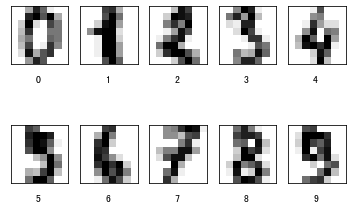

In [4]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [6]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [8]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1 + np.exp(-1 * z))
    return s

In [9]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [10]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''

    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [11]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights (dim, 1)
    b - bias
    X - data (m, dim)
    Y - ground truth (dim,)
    '''
    m = X.shape[0]
    A = sigmoid(np.dot(w.T, X.T) + b) # (1, m)
    cost = -(1/m)*np.sum(np.log(A)*Y+np.log(1-A)*(1-Y),axis = 1)
    
    dw = 1/m*np.dot(X.T,(A-Y).T) 
    db = 1/m*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [12]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [13]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights  (dim, 1)
    b -- bias 
    X -- data (m, dim)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    A = sigmoid(np.dot(X, w) + b)  # (m, 1)
    
    for i in range(A.shape[0]):
        if(A[i][0] >= 0.5):
             Y_prediction[0][i] = 1
        else:
             Y_prediction[0][i] = 0 
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [14]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    
    w, b = initialize_parameters(X_train.shape[1])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = params['w']
    b = params['b']
    
    Y_train_predict = predict(w,b,X_train)
    training_accuracy = np.sum(Y_train_predict == Y_train) / len(Y_train)
    
    Y_test_predict = predict(w,b,X_test)
    test_accuracy = np.sum(Y_test_predict == Y_test) / len(Y_test)
    
    d = {"w":w,
         "b":b,
         "training_accuracy": training_accuracy,
         "test_accuracy":test_accuracy,
         "costs":costs}
    return d

In [15]:
num_iterations = 1000
learning_rate = 1e-2
d = model(X_train, y_train, X_test, y_test, num_iterations = num_iterations, learning_rate = learning_rate, print_cost = True)
d

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.397242
Cost after iteration 200: 0.293861
Cost after iteration 300: 0.268899
Cost after iteration 400: 0.261464
Cost after iteration 500: 0.257014
Cost after iteration 600: 0.251708
Cost after iteration 700: 0.250202
Cost after iteration 800: 0.248366
Cost after iteration 900: 0.247381


{'w': array([[ 0.00000000e+00],
        [-2.13876846e-02],
        [ 2.91115156e-02],
        [ 2.28789638e-03],
        [ 6.43208788e-02],
        [ 1.34811355e-01],
        [ 1.37757851e-01],
        [-4.25219916e-02],
        [ 2.54673898e-02],
        [-1.05143855e-01],
        [ 1.16040592e-01],
        [ 8.97106528e-02],
        [-4.39686736e-02],
        [-7.66003935e-02],
        [ 4.83639565e-02],
        [-1.51461304e-03],
        [-9.25456058e-03],
        [ 8.72542100e-02],
        [ 1.63979120e-01],
        [-3.26537015e-02],
        [-2.44458836e-01],
        [-7.26731588e-02],
        [-1.03333924e-01],
        [-5.81402681e-02],
        [-6.68018160e-03],
        [-2.07167601e-01],
        [-8.34853307e-03],
        [ 1.96413455e-01],
        [ 3.20495130e-02],
        [ 1.78223529e-01],
        [-1.90873254e-01],
        [-1.06957232e-02],
        [ 0.00000000e+00],
        [-2.24839020e-01],
        [ 1.13496069e-02],
        [ 1.91686388e-01],
        [-8.78877614e-0

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [16]:
num_iterations = 1000

learning_rate1 = 2e-2
d1 = model(X_train, y_train, X_test, y_test, num_iterations = num_iterations, learning_rate = learning_rate1, print_cost = False)

learning_rate2 = 2e-3
d2 = model(X_train, y_train, X_test, y_test, num_iterations = num_iterations, learning_rate = learning_rate2, print_cost = False)

learning_rate3 = 2e-4
d3 = model(X_train, y_train, X_test, y_test, num_iterations = num_iterations, learning_rate = learning_rate3, print_cost = False)

learning_rate4 = 2e-5
d4 = model(X_train, y_train, X_test, y_test, num_iterations = num_iterations, learning_rate = learning_rate4, print_cost = False)

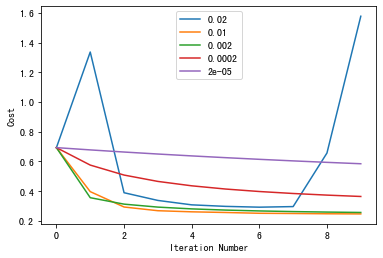

In [17]:
plt.plot(d1['costs'], label=learning_rate1)
plt.plot(d['costs'], label=learning_rate)
plt.plot(d2['costs'], label=learning_rate2)
plt.plot(d3['costs'], label=learning_rate3)
plt.plot(d4['costs'], label=learning_rate4)

plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.legend()

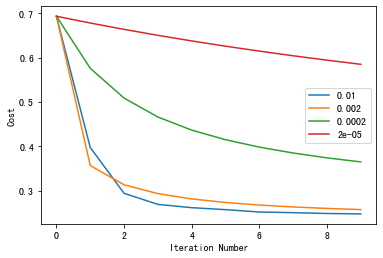

In [18]:
# remove learning rate at 0.02
plt.plot(d['costs'], label=learning_rate)
plt.plot(d2['costs'], label=learning_rate2)
plt.plot(d3['costs'], label=learning_rate3)
plt.plot(d4['costs'], label=learning_rate4)

plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.legend()

综上，learning rate越大，learning curve越陡，但若是太小，需要iteration的次数也会增加，达到最小值越慢。

##### 4.2 Observe the effect of iteration_num on the test accuracy.

In [19]:
num_iterations_list = [100, 500, 1000, 2000, 5000, 10000]
y = []
for n_iterate in num_iterations_list:
    res = model(X_train, y_train, X_test, y_test, num_iterations = n_iterate, learning_rate = learning_rate, print_cost = False)
    y.append(res["test_accuracy"])

Text(0, 0.5, 'Test Accuracy')

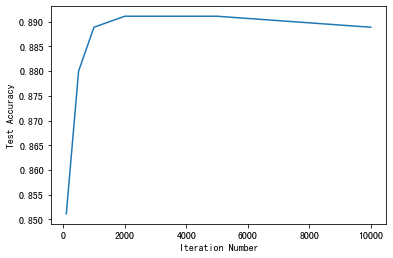

In [20]:
plt.plot(num_iterations_list, y)
plt.xlabel("Iteration Number")
plt.ylabel("Test Accuracy")

Iteration Number太小，不够准确，但太大，准确度也会稍微降低。

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.